In [1]:
# Cell 1: Imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Cell 2: Read CSV into DataFrame
df = pd.read_csv("./train.csv")

In [5]:
# Cell 3: Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [6]:
# Cell 4: Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [7]:
# Cell 5: Add Age_missing column
df['Age_missing'] = df['Age'].isnull().astype(int)

In [ ]:
# Cell 6: Extract and clean Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Dona', 'Sir', 'Lady', 'Countess'], 'Rare')

In [9]:
# Cell 7: Impute missing Age values by Title median
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
# Cell 8: Create FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [12]:
# Cell 9: Bin Age and Fare
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80])
df['FareBin'] = pd.cut(df['Fare'], bins=[0, 25, 50, 100, 250, 600])

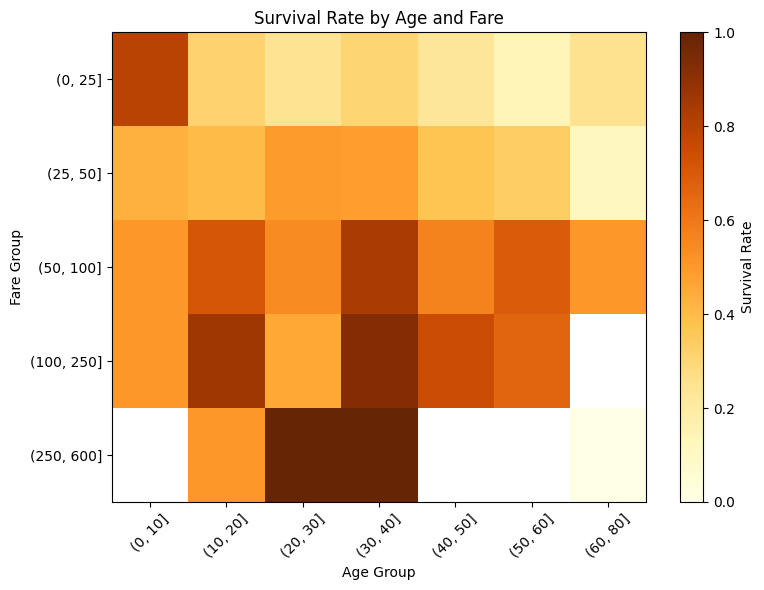

In [13]:
# Cell 10: Compute and plot survival rate heatmap
heatmap_data = df.pivot_table(index='FareBin', columns='AgeBin', values='Survived', aggfunc='mean')
plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, cmap='YlOrBr', aspect='auto', interpolation='nearest')
plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=[str(c) for c in heatmap_data.columns], rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=[str(r) for r in heatmap_data.index])
plt.xlabel('Age Group')
plt.ylabel('Fare Group')
plt.title('Survival Rate by Age and Fare')
plt.colorbar(label='Survival Rate')
plt.tight_layout()
plt.show()